In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, ActivityRegularization
from tensorflow.keras.optimizers import Adam
plt.rcParams['font.family'] = 'SimSun'

data = pd.read_csv('../data.csv',encoding='gbk')

amounts = data['航线金额'].values  # 假设航线金额列名称为 '航线金额'，请根据你的实际数据进行调整

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_amounts = scaler.fit_transform(amounts.reshape(-1, 1))

# 定义时间步长度和训练集大小
seq_length = 14
train_size = int(len(scaled_amounts) * 0.8)

# 创建训练集和测试集
train_data = scaled_amounts[:train_size]
test_data = scaled_amounts[train_size:]

# 创建序列数据
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# 创建训练集和测试集的序列数据
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# 创建并训练 LSTM 模型
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

# 使用训练好的模型进行预测
predictions = model.predict(X_test)

# 将预测结果反缩放到原始范围
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)


Epoch 1/50


D:\anaconda\envs\datawym\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1963
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0450
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0326
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0242
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0236
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0186
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0155
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0134
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0133
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0140
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0134
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0129
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0139
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0130
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0103
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/

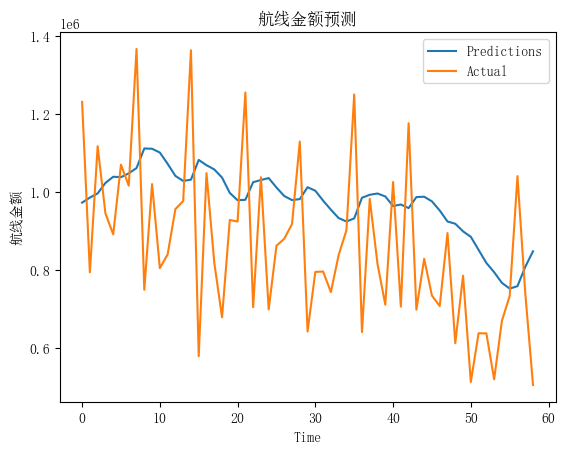

In [2]:
# 绘制折线图
plt.plot(predictions, label='Predictions')
plt.plot(y_test, label='Actual')
plt.xlabel('Time')
plt.ylabel('航线金额')
plt.title('航线金额预测')
plt.legend()
plt.show()

拟合程度不好，数据量太少，模型复杂度不够，学习率没调好